# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 5

### **Vectores Embebidos Pre-entrenados: Fasttext**

#### **Nombres y matrículas de los integrantes del equipo:**



*   José de Jesús Peña Rodríguez    A01794940
*   Gustavo Pérez Juárez            A01795310
*   Anghelo Daniel Pérez Martínez   A01795323
*   Rafael Alexis Pinto Flores      A01794500
*   Irene Plascencia Villalobos     A01625258








In [49]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
# Incluye aquí todas las librerías y paquetes que requieras.


import os
import re
import pandas as pd
import json
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


##**Pregunta - 1:**



Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.



In [26]:
# Leer el archivo de texto
with open('noticiasTopicModeling.txt', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extraer los cuerpos de texto
cuerpos_texto = [item['texto'] for item in data]

# Crear el DataFrame
df = pd.DataFrame(cuerpos_texto, columns=['Cuerpo_text'])
print(df)

                                            Cuerpo_text
0     "España ha dejado de ser católica", decía Manu...
1     El clima de crispación social en Ceuta ha lleg...
2     El Gobierno ha alegado la suspensión de plazos...
3     Puedes mandar tu pregunta, sugerencia o queja ...
4     Panamá debe entregar esta semana a la Corte In...
...                                                 ...
5653  El juez del caso Villarejo, Manuel García-Cast...
5654  España se acerca a los 260.000 casos de COVID-...
5655  Transferencias, préstamos y condiciones. "Nunc...
5656  El 14 de marzo, ante la declaración del estado...
5657  Madrid, 1 sep (EFE).- Finalmente, septiembre h...

[5658 rows x 1 columns]


In [27]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5658 entries, 0 to 5657
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cuerpo_text  5658 non-null   object
dtypes: object(1)
memory usage: 44.3+ KB


In [28]:
# Y veamos sus primeros registros:

df.head()

,Cuerpo_text
0,"""España ha dejado de ser católica"", decía Manu..."
1,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno ha alegado la suspensión de plazos...
3,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,Panamá debe entregar esta semana a la Corte In...


##**Pregunta - 2:**

Realiza el proceso de limpieza.

Aplica el preprocesamiento que consideres adecuado, sin embargo, deberás aplicar necesariamente alguna de las técnicas de lematización.











In [29]:
mis_stopwords_esp=[]
mis_stopwords_esp=stopwords.words('spanish')
len(mis_stopwords_esp)
print(mis_stopwords_esp[:15])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con']


In [30]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

def clean_acents(texto):
    acentos = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U',
        'ñ': 'n', 'Ñ': 'N'
    }
    
    def reemplazar(match):
        char = match.group(0)
        return acentos.get(char, char)
    
    patron = re.compile('|'.join(re.escape(key) for key in acentos.keys()))
    
    return patron.sub(reemplazar, texto)

def clean_tok(doc):
    # Reemplazar caracteres con acentos
    doc_stp1 = clean_acents(doc)
    doc_stp1 = re.sub(r'[^a-zA-Z]', ' ', doc_stp1)
    # Conversión a minúsculas 
    doc_stp2 = doc_stp1.lower()
    # Separar el texto en tokens
    tokens = [word for word in doc_stp2.split() if word not in mis_stopwords_esp]
    # Filtrar tokens por longitud
    long_token = 1
    filtered_tokens = [word for word in tokens if len(word) > long_token]
    return filtered_tokens

In [31]:
noticias=df.Cuerpo_text

In [32]:
# Aplicamos el proceso de limpieza y tokenización:
limpieza_token = [clean_tok(noticia) for noticia in noticias]

In [33]:
limpieza_token_str = [', '.join(tokens) for tokens in limpieza_token]
serie = pd.Series(limpieza_token_str)
df_tokens = pd.DataFrame(serie, columns=['Tokens'])

In [34]:
limpieza_token[0:10]

[['espana',
  'dejado',
  'ser',
  'catolica',
  'decia',
  'manuel',
  'azana',
  'comienzo',
  'segunda',
  'republica',
  'aquel',
  'congreso',
  'diputados',
  'aprobo',
  'leyes',
  'laicistas',
  'metafora',
  'dejo',
  'ser',
  'catolica',
  'papel',
  'ley',
  'creencias',
  'buena',
  'parte',
  'pueblo',
  'migracion',
  'integracion',
  'europea',
  'programa',
  'vox',
  'europa',
  'saber',
  'mas',
  'espana',
  'domingo',
  'noviembre',
  'dejado',
  'ser',
  'excepcion',
  'europa',
  'potencia',
  'extrema',
  'derecha',
  'parlamento',
  'tambien',
  'metafora',
  'pues',
  'precisamente',
  'excepcional',
  'tener',
  'dictadura',
  'mediados',
  'setenta',
  'dictador',
  'aun',
  'mausoleo',
  'despues',
  'anos',
  'muerto',
  'existia',
  'tal',
  'cosa',
  'portugal',
  'grecia',
  'italia',
  'alemania',
  'paises',
  'dictaduras',
  'fascistas',
  'espana',
  'si',
  'paso',
  'portugal',
  'italia',
  'alemania',
  'derroto',
  'fascismo',
  'franquismo',
  

In [35]:
df_tokens

,Tokens
0,"espana, dejado, ser, catolica, decia, manuel, ..."
1,"clima, crispacion, social, ceuta, llegado, pun..."
2,"gobierno, alegado, suspension, plazos, derivad..."
3,"puedes, mandar, pregunta, sugerencia, queja, t..."
4,"panama, debe, entregar, semana, corte, interam..."
...,...
5653,"juez, caso, villarejo, manuel, garcia, castell..."
5654,"espana, acerca, casos, covid, confirmados, ini..."
5655,"transferencias, prestamos, condiciones, nunca,..."
5656,"marzo, declaracion, alarma, decreto, medidas, ..."


In [36]:
import spacy
nlp = spacy.load("es_core_news_sm")

def process_tokens(lista_tokens):

    #Unimos la lista de tokens 
    texto = " ".join(lista_tokens)

    #Procesamos el texto con spacy
    processing_text=nlp(texto)

    #Creamos una lista nueva con los tokens procesados 
    lista_tokens_lema=[token_lema.lemma_ for token_lema in processing_text]

    #Creamos una lista vacia en donde guardaremos los tokens 
    lista_tokens_no_repetidos=[]

    for token in lista_tokens_lema:
        if token not in lista_tokens_no_repetidos:
            lista_tokens_no_repetidos.append(token)
    
    return lista_tokens_no_repetidos

In [37]:
tokens_lematizados = [process_tokens(noticia) for noticia in limpieza_token]

In [43]:
df_tokens_lema = pd.Series(tokens_lematizados)
df_tokens_lema = pd.DataFrame(serie, columns=['Tokens_procesados'])
df_tokens_lema

,Tokens_procesados
0,"espana, dejado, ser, catolica, decia, manuel, ..."
1,"clima, crispacion, social, ceuta, llegado, pun..."
2,"gobierno, alegado, suspension, plazos, derivad..."
3,"puedes, mandar, pregunta, sugerencia, queja, t..."
4,"panama, debe, entregar, semana, corte, interam..."
...,...
5653,"juez, caso, villarejo, manuel, garcia, castell..."
5654,"espana, acerca, casos, covid, confirmados, ini..."
5655,"transferencias, prestamos, condiciones, nunca,..."
5656,"marzo, declaracion, alarma, decreto, medidas, ..."


Parte 1: Indexación semántica latente (LSI):

3. Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con
algunas de sus columnas con sus nombres, donde las columnas son los tokens. ¿Cuál es el
significado de cada renglón? ¿Y el significado de cada columna?

In [47]:
vectorizador = TfidfVectorizer()
matrix_tfidf = vectorizador.fit_transform(df_tokens_lema['Tokens_procesados'])
features_names= vectorizador.get_feature_names_out()
df_tfidf = pd.DataFrame(matrix_tfidf.toarray(), columns=features_names)
df_tfidf

,aa,aaas,aac,aahjko,aai,aaim,aaiun,aalla,aamir,aamma,...,zurron,zutik,zuzendaritzaren,zuzeneko,zvi,zwift,zwvy,zxs,zxsptbgxnd,zyed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4. Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con
10 componentes y obtener el gráfico de la importancia relativa de estas.

In [55]:
svd = TruncatedSVD(n_components=10)
matrix_svd= svd.fit_transform(matrix_tfidf)
df_matrix_svd = pd.DataFrame(matrix_svd)
df_matrix_svd

,0,1,2,3,4,5,6,7,8,9
0,0.175456,-0.108657,0.049370,-0.006692,-0.038401,0.092107,-0.071955,-0.082348,-0.001870,0.035105
1,0.214104,-0.136779,0.103268,-0.019986,-0.047977,0.037966,-0.048305,-0.041497,0.002912,-0.017669
2,0.118294,0.006979,-0.005370,-0.016003,0.040726,-0.008205,0.016119,-0.004924,-0.027756,-0.023357
3,0.263049,-0.059120,-0.081131,-0.001057,0.028687,0.038643,-0.057484,0.036727,0.091569,-0.012894
4,0.114662,0.036705,-0.027276,-0.022837,0.029216,0.003753,-0.000396,-0.000375,-0.039066,-0.015984
...,...,...,...,...,...,...,...,...,...,...
5653,0.243226,-0.168636,0.075396,-0.054442,0.259382,-0.221646,0.061836,-0.169930,0.050855,-0.109751
5654,0.361091,0.237490,-0.006920,0.032252,-0.000749,-0.083748,-0.167766,-0.065890,-0.096643,0.071932
5655,0.227446,-0.023736,-0.100507,-0.043020,-0.021986,0.108962,0.150883,-0.078274,-0.133705,0.167420
5656,0.200215,0.001483,-0.098796,-0.028047,0.059913,0.062950,-0.057740,0.000946,0.119622,-0.007662


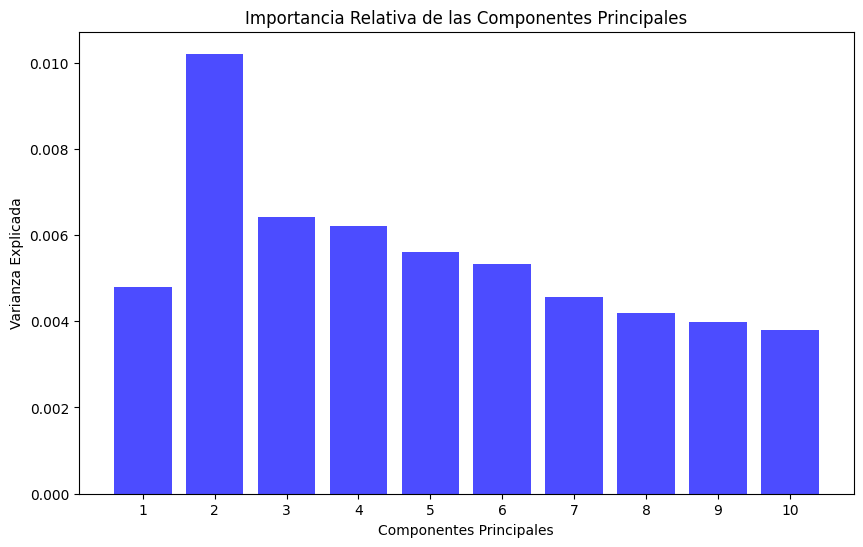

In [60]:
#Graficamos los compoentes latentes usando la media por columna
explained_variance = svd.explained_variance_ratio_
# Graficar la importancia relativa de las 10 componentes
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance, alpha=0.7, color='b', align='center')
plt.title('Importancia Relativa de las Componentes Principales')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(range(1, 11))
plt.show()




5. Obtener la matriz tokens-temas (term-topic) a partir de la matriz 𝑉t de la descomposición SVD.
Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas.

In [ ]:
#Se obtienen los componentes 

#**Pregunta - 3:**



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [39]:

# ************* Inicia la sección de agregar código:*****************************
#Dividir los datos, conjuntos de entrenamiento (70%) y validación/prueba(30%).
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)


# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

NameError: name 'train_test_split' is not defined

#**Pregunta - 4:**



Construye tu vocabulario a continuación


In [ ]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

midiccionario = Counter()

# Iterar sobre cada reseña en el conjunto de entrenamiento
for k in range(len(x_train)):
  midiccionario.update(x_train[k])


print('Longitud del diccionario:', len(midiccionario))
print('\n(word,frequency):')
print(midiccionario.most_common(10))

#Número de veces que el token tiene que aparecer.
min_freq = 2
#Se crea el diccionario, en donde solo tomaran encuenta aquelos que tenga una incidencia de dos o más ocasiones.
midicc = {token: count for token, count in midiccionario.items() if count >= min_freq}

# *********** Aquí termina la sección de agregar código *************

Longitud del diccionario: 3375

(word,frequency):
[('not', 206), ('god', 167), ('movie', 140), ('great', 137), ('phone', 125), ('film', 123), ('one', 114), ('work', 102), ('like', 95), ('time', 90)]


In [ ]:
# b.	Indica el tamaño del vocabulario generado.

print('Longitud del vocabulario generado:')

# ******* Inicia la sección de agregar código: ***********
print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])     # veamos algunos elementos del diccionario.

# *********** Aquí termina la sección de agregar código *************

Longitud del vocabulario generado:
Nueva longitud del nuevo vocabulario: 1490
[('thing', 33), ('like', 95), ('desert', 6), ('unfortunately', 8), ('not', 206)]


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++

Para evitar el problema del dataleakage

### ++++++++ Termina la sección de agregar texto: +++++++++++


In [ ]:
# d.	Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])


for k in range(5):
  print('Antes:', x_train[k])
  print('Después:', train_x[k])
# *********** Aquí termina la sección de agregar código *************


Antes: ['thing', 'like', 'prime', 'rib', 'desert', 'section']
Después: ['thing', 'like', 'desert']
Antes: ['unfortunately', 'not', 'recharge', 'iphone', 'despite', 'conect', 'multiple', 'power', 'source', 'imac', 'external', 'batery', 'wal', 'outlet', 'etc']
Después: ['unfortunately', 'not', 'recharge', 'iphone', 'despite', 'conect', 'multiple', 'power', 'source', 'batery', 'wal', 'outlet', 'etc']
Antes: ['cal', 'drop', 'phone', 'come', 'scren', 'go', 'black', 'worst', 'stop', 'ring', 'intermitently']
Después: ['cal', 'drop', 'phone', 'come', 'scren', 'go', 'black', 'worst', 'stop', 'ring']
Antes: ['couldn', 'figure']
Después: ['couldn']
Antes: ['recomend', 'friend']
Después: ['recomend', 'friend']


In [ ]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

#**Pregunta - 5:**


a. Incluye una tabla comparativa de pros y contras entre los modelos FastText, word2vec de Google y Glove de Stanford.

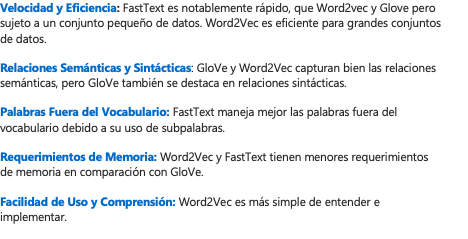

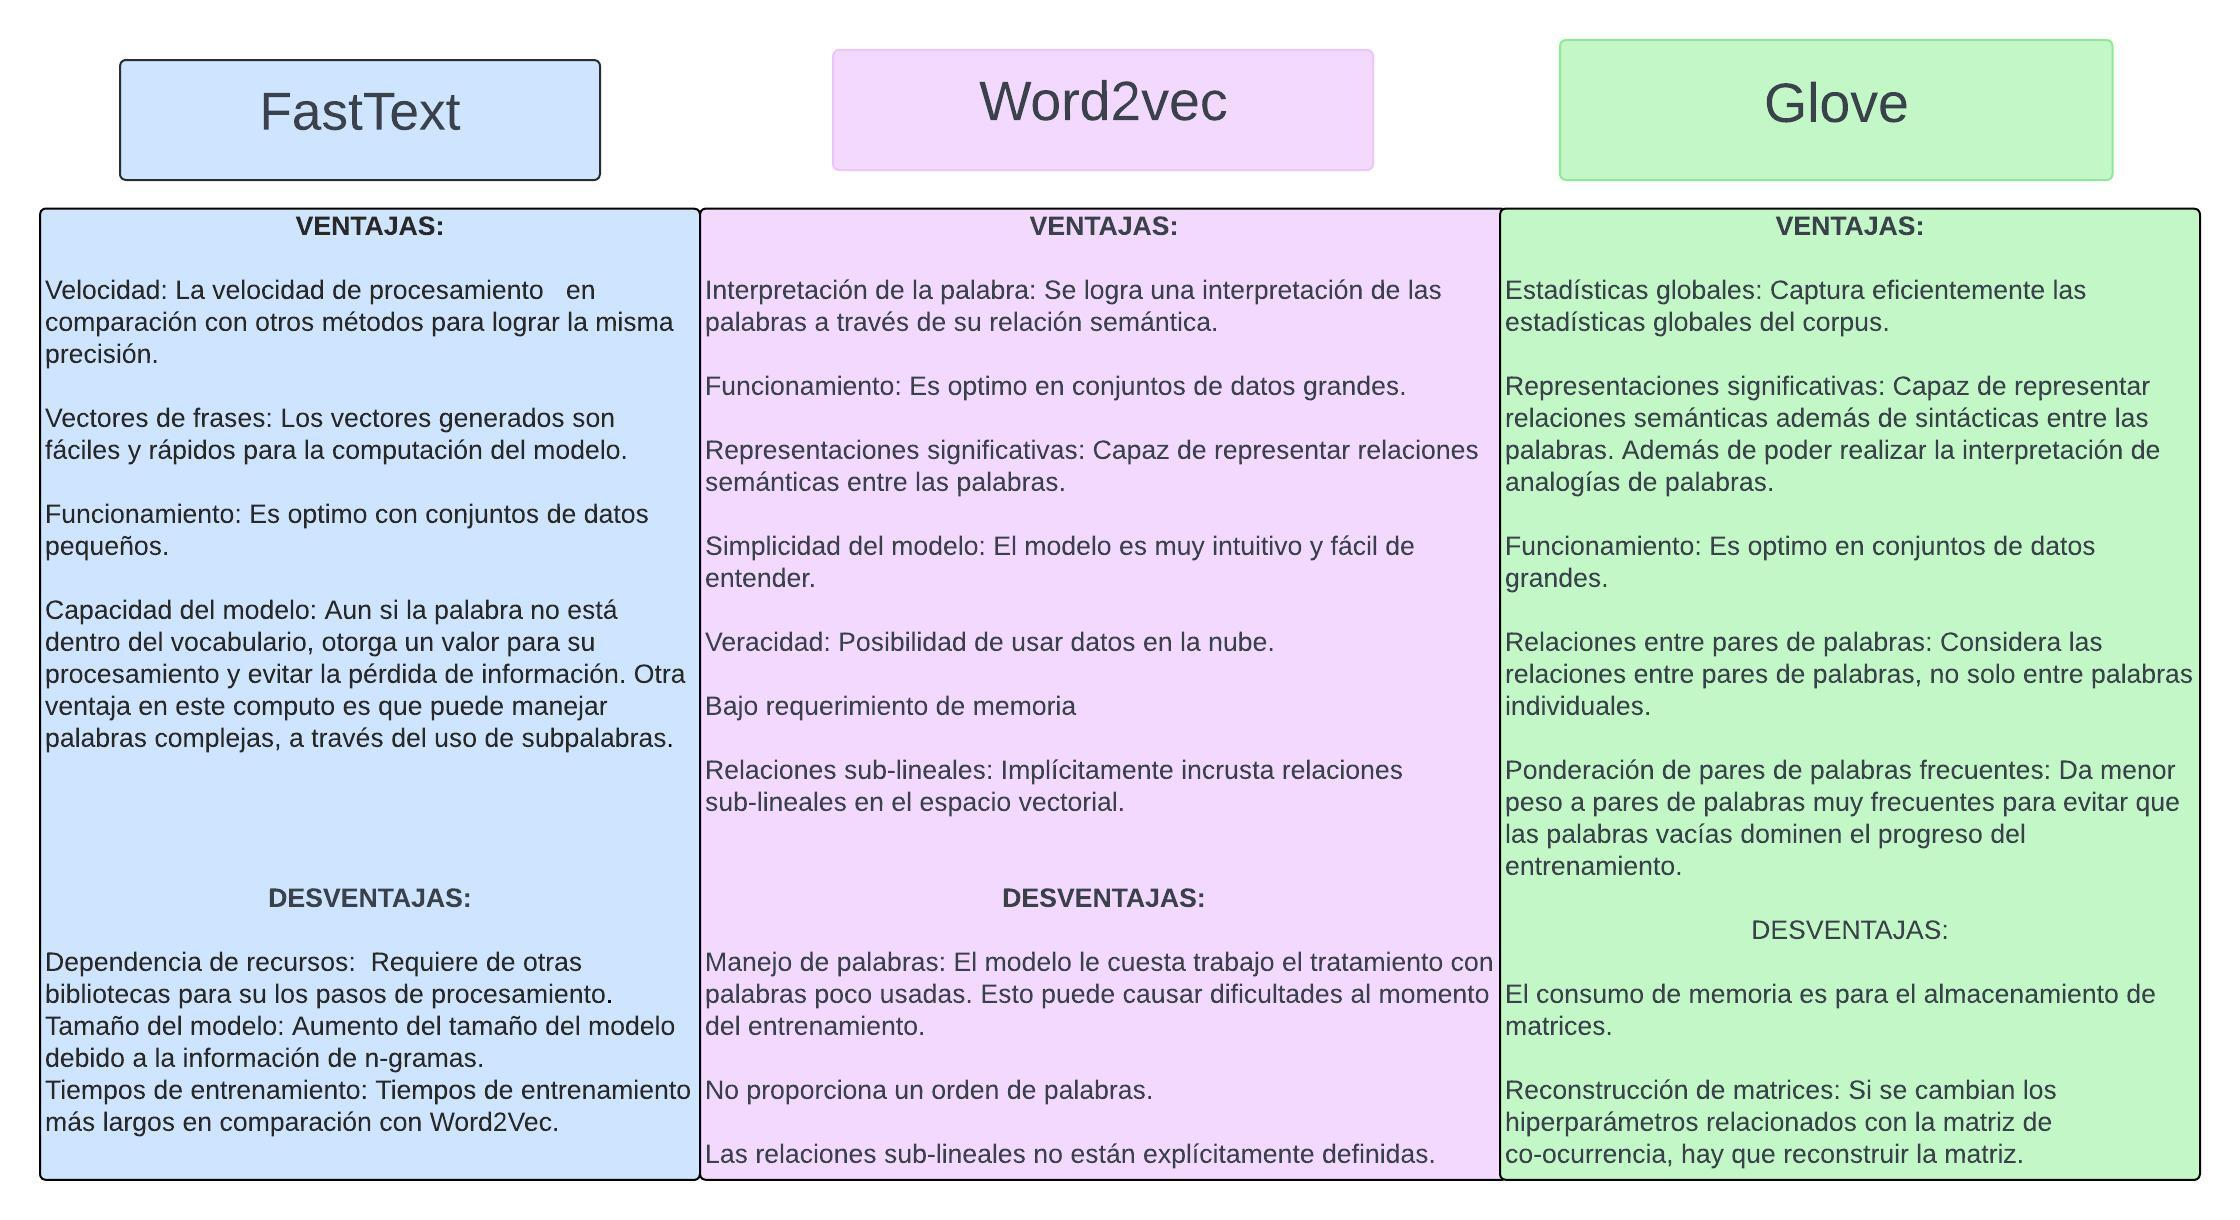

#**Pregunta - 6:**

Utiliza el modelo FastText de vectores embebidos pre-entrenados de dimensión 300 para generar un nuevo diccionario clave-valor, donde la “clave” será cada token o palabra de tu vocabulario y el “valor” será su vector embebido de dimensión 300.

Este diccionario deberá ser del mismo tamaño que el vocabulario previo que hayas construido previamente.

Es recomendable que una vez que generes el nuevo vocabulario de vectores embebidos, guardes dicho diccionario en un archivo.

Recuerda borrar la variable donde descargaste los 2 millones de vectores embebidos Fasttext.



In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

ft = fasttext.load_model('cc.en.300.bin');
len(ft.words)

vocab = midiccionario
ft_dic = {}

for w in vocab:
  ft_dic.update({w: ft.get_word_vector(w)})

# *********** Aquí termina la sección de agregar código *************

#**Pregunta - 7:**



Generamos los vectores embebidos a paertir de los conjuntos de entrenamiento, validación y preuba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


# Función para obtener embeddings de un conjunto de textos
def get_embeddings_fasttext(texts, model):
    embeddings = []
    for text in texts:
        text_embeddings = [model.get_word_vector(word) for word in text]
        if text_embeddings:
            embeddings.append(np.mean(text_embeddings, axis=0))
        else:
            embeddings.append(np.zeros(model.get_dimension()))  # Vector cero si no hay palabras
    return embeddings

# Obtener embeddings para cada conjunto
trainEmb = get_embeddings_fasttext(train_x, ft)
valEmb = get_embeddings_fasttext(val_x, ft)
testEmb = get_embeddings_fasttext(test_x, ft)


# *********** Aquí termina la sección de agregar código *************

In [ ]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", pd.DataFrame(trainEmb).shape)
print("Val-Emb:", pd.DataFrame(valEmb).shape)
print("Test-Emb:", pd.DataFrame(testEmb).shape)

Train-Emb: (2100, 300)
Val-Emb: (450, 300)
Test-Emb: (450, 300)


#**Pregunta - 8:**


In [ ]:
len(y_train)

2100

In [ ]:
len(trainEmb)

2100


Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [ ]:
# REGRESIÓN LOGÍSTICA:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********


logreg = LogisticRegression(solver="liblinear", penalty="l2")
logreg.fit(trainEmb, y_train)

# Predicciones
train_pred_logreg = logreg.predict(trainEmb)
val_pred_logreg = logreg.predict(valEmb)

# Evaluación
def evaluate_model(true_labels, predictions):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    return accuracy, precision, recall, f1

train_metrics_logreg = evaluate_model(y_train, train_pred_logreg)
val_metrics_logreg = evaluate_model(y_val, val_pred_logreg)

print("Logistic Regression - Train Metrics:", train_metrics_logreg)
print("Logistic Regression - Validation Metrics:", val_metrics_logreg)

# *********** Aquí termina la sección de agregar código *************


Logistic Regression - Train Metrics: (0.8319047619047619, 0.8319695155578776, 0.8319047619047619, 0.8319052574237167)
Logistic Regression - Validation Metrics: (0.8111111111111111, 0.8122651531113921, 0.8111111111111111, 0.8112034937431764)


In [ ]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


# Modelo de bosque aleatorio
rf = RandomForestClassifier(n_estimators=100, criterion="entropy")
rf.fit(trainEmb, y_train)

# Predicciones
train_pred_rf = rf.predict(trainEmb)
val_pred_rf = rf.predict(valEmb)

# Evaluación
train_metrics_rf = evaluate_model(y_train, train_pred_rf)
val_metrics_rf = evaluate_model(y_val, val_pred_rf)

print("Random Forest - Train Metrics:", train_metrics_rf)
print("Random Forest - Validation Metrics:", val_metrics_rf)

# *********** Aquí termina la sección de agregar código *************

Random Forest - Train Metrics: (0.9980952380952381, 0.9980970694724749, 0.9980952380952381, 0.9980952484616278)
Random Forest - Validation Metrics: (0.7711111111111111, 0.771023377904621, 0.7711111111111111, 0.7710329150664644)


#**Pregunta - 9:**



Reporte del mejor modelo.


In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

print('Test-accuracy %.2f%%' % (100*rf.score(testEmb, y_test)))

pred = rf.predict(testEmb)

print('\nMatriz de confusión (conteo):')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión (porcentaje):')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

print('\nReporte de clasificación')
print(classification_report(y_test, pred))

# *********** Aquí termina la sección de agregar código *************

Test-accuracy 77.33%

Matriz de confusión (conteo):
[[171  51]
 [ 51 177]]

Matriz de confusión (porcentaje):
[[0.38       0.11333333]
 [0.11333333 0.39333333]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       222
           1       0.78      0.78      0.78       228

    accuracy                           0.77       450
   macro avg       0.77      0.77      0.77       450
weighted avg       0.77      0.77      0.77       450



#**Pregunta - 10:**



Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

En conclusión, este trabajo nos ayudo a demostrar la eficacia del modelo de vectores FastText para mejorar el procesamiento de texto en ciertas aplicaciones.

Al generar un vocabulario a partir de los datos de entrenamiento y sustituir las palabras por sus vectores continuos correspondientes, se lográ representar el mensaje que se quiere comunicar de forma más acertada. Esta herramienta esta destinada para mejorar de forma significativa la comprensión y el análisis de texto en diversos contextos.  

Para aumentar aún más la efiencia del modelo, recomendaríamos seguir probando diferentes estrategias adicionales de preprocesamiento, para lograr alcanzar una mayor limpieza y normalización de los datos.

### ++++++++ Termina la sección de agregar texto: +++++++++++

##**Fin de la Actividad de vectores Embebidos - FastText**